In [303]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib
from matplotlib import pyplot as plt
import sklearn
import openpyxl
import statsmodels.api as sm
import seaborn as sns
import statsmodels.stats.proportion
#библиотеки


In [304]:
#1 
df = pd.read_excel('sample_1.xlsx', names = ['stlb'])
df
#Открываем файл 


,stlb
0,1.100026e+09
1,1.100023e+09
2,1.100026e+09
3,1.100026e+09
4,1.100025e+09
...,...
114,1.100023e+09
115,1.100026e+09
116,1.100027e+09
117,1.100024e+09


array([[<AxesSubplot:title={'center':'stlb'}>]], dtype=object)

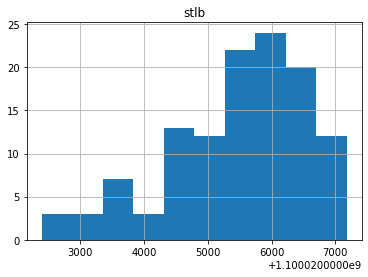

In [305]:
df.hist()
#Создание гистограммы

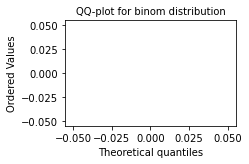

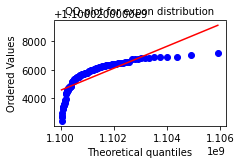

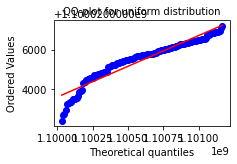

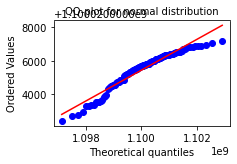

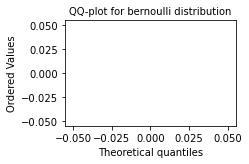

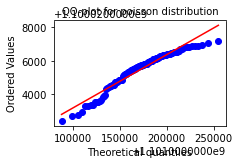

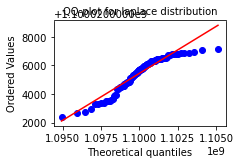

In [306]:
fig = plt.figure()
ax_norm = fig.add_subplot(221)
distributions = {'binom' : ss.binom, 'expon' : ss.expon, 'uniform' : ss.uniform,
                 'normal' : ss.norm, 'bernoulli' : ss.bernoulli, 'poisson' : ss.poisson, 'laplace' : ss.laplace}

for counter, distr_type in enumerate(list(distributions.values())):
    res = ss.probplot(df['stlb'], dist=distr_type, sparams=(
        np.mean(df['stlb']), np.var(df['stlb'])), plot=ax_norm)
    ax_norm.set_title(
        f"QQ-plot for {list(distributions.keys())[counter]} distribution", fontsize=10.)

    fig.tight_layout()
    plt.show()

    if counter != len(distributions) - 1:
        fig = plt.figure()
        ax_norm = fig.add_subplot(221)
        #Вывел все способы для формулирования гипотезы 


In [307]:
ss.kstest(df["stlb"], cdf=ss.laplace(ss.laplace.fit(df["stlb"])[0],ss.laplace.fit(df["stlb"])[1]).cdf)
#Проверил выборку с помощью критерия Колмогорова-Смирнова на распределение Лапласа

KstestResult(statistic=0.10189489508077157, pvalue=0.15762438021319347)

In [308]:
#2 
df2 = pd.read_excel('sample_2.xlsx', names = ['stlb'])
df2
#Открываем файл 

,stlb
0,638194.66
1,637984.86
2,637934.13
3,637991.82
4,638087.37
...,...
114,637992.27
115,637931.41
116,638116.71
117,638005.10


array([[<AxesSubplot:title={'center':'stlb'}>]], dtype=object)

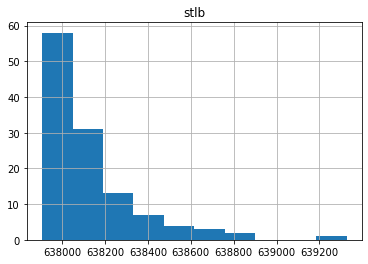

In [309]:
df2.hist()
#Создание гистограммы

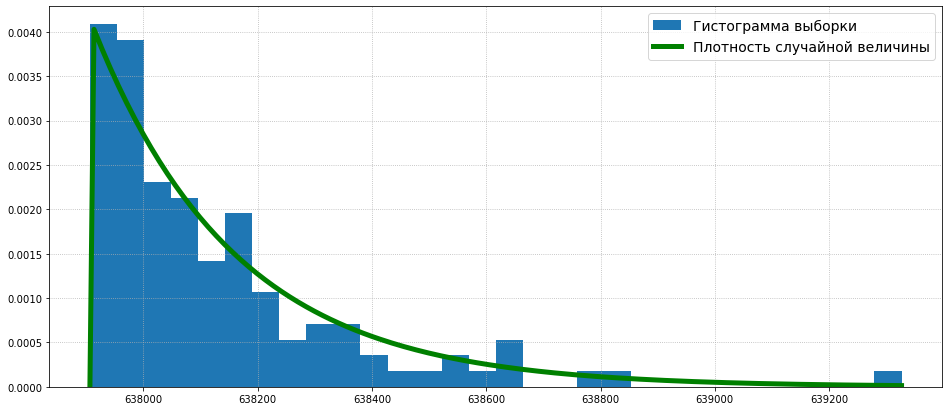

In [331]:
grid = np.linspace(df2['stlb'].min(), df2['stlb'].max(), 200)  

plt.figure(figsize=(16, 7))
plt.hist(df2, bins=30, density=True, 
         alpha=1, label='Гистограмма выборки') 
plt.plot(grid, ss.expon.pdf(grid, loc=np.mean(df2['stlb'])-210, scale=np.std(df2['stlb'])+20.8), color='green', 
         lw=5, label='Плотность случайной величины') 
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

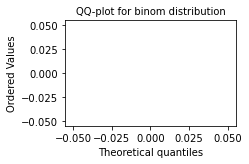

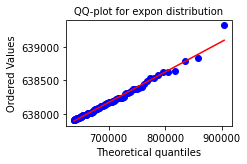

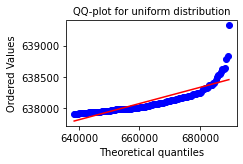

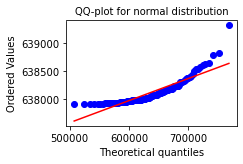

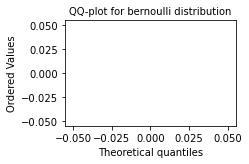

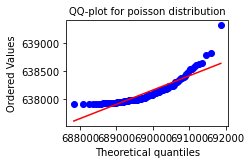

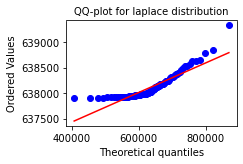

In [311]:
fig = plt.figure()
ax_norm = fig.add_subplot(221)
distributions = {'binom' : ss.binom, 'expon' : ss.expon, 'uniform' : ss.uniform,
                 'normal' : ss.norm, 'bernoulli' : ss.bernoulli, 'poisson' : ss.poisson, 'laplace' : ss.laplace}

for counter, distr_type in enumerate(list(distributions.values())):
    res = ss.probplot(df2['stlb'], dist=distr_type, sparams=(
        np.mean(df2['stlb']), np.var(df2['stlb'])), plot=ax_norm)
    ax_norm.set_title(
        f"QQ-plot for {list(distributions.keys())[counter]} distribution", fontsize=10.)

    fig.tight_layout()
    plt.show()

    if counter != len(distributions) - 1:
        fig = plt.figure()
        ax_norm = fig.add_subplot(221)
        #Вывел все способы для формулирования гипотезы 

In [312]:
ss.kstest(df2["stlb"], cdf=ss.expon(ss.expon.fit(df2["stlb"])[0],ss.expon.fit(df2["stlb"])[1]).cdf)
#Проверил выборку с помощью критерия Колмогорова-Смирнова на экспоненциальное распределение

KstestResult(statistic=0.05233070629287867, pvalue=0.8832042680106802)

In [313]:
#3
df3 = pd.read_excel('sample_3.xlsx')
df3

,Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0
0,0.0,13.79,17.21,18.49,18.84,16.98,14.10,16.53,16.39,10.96,...,18.36,19.14,10.19,16.56,10.25,14.24,12.29,12.74,18.69,19.82
1,1.0,13.05,9.09,19.11,16.04,14.25,16.74,19.34,11.15,13.38,...,19.14,12.01,13.76,18.98,18.20,15.76,20.35,16.26,16.87,19.81


In [314]:
df3.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

df3.reset_index(inplace=True)
df3.drop(labels = ['index'], axis = 1, inplace = True)

df3 = df3.transpose()

In [315]:
df3.rename(columns={0:'до', 1 : 'после'},inplace=True)
df3

,до,после
0.0,13.79,13.05
1.0,17.21,9.09
2.0,18.49,19.11
3.0,18.84,16.04
4.0,16.98,14.25
...,...,...
115.0,14.24,15.76
116.0,12.29,20.35
117.0,12.74,16.26
118.0,18.69,16.87


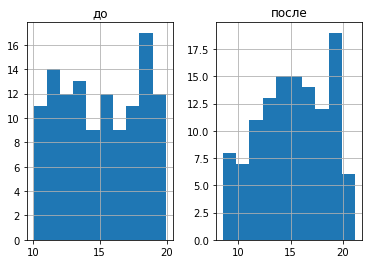

In [316]:
df3.hist()
plt.show()

In [317]:
#гипотеза: терапия была эффективна

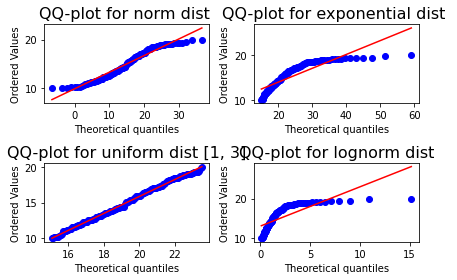

In [318]:
fig = plt.figure()
ax_norm = fig.add_subplot(221)
res = ss.probplot(df3["до"], dist=ss.norm, sparams=(np.mean(df3["до"]), np.var(df3["до"])), plot=ax_norm)
ax_norm.set_title("QQ-plot for norm dist ", fontsize=16.)

ax_expon = fig.add_subplot(222)
res = ss.probplot(df3["до"], dist=ss.expon, sparams=(np.mean(df3["до"]), np.var(df3["до"])), plot=ax_expon)
ax_expon.set_title("QQ-plot for exponential dist ", fontsize=16.)

ax_uni = fig.add_subplot(223)
res = ss.probplot(df3["до"], dist=ss.uniform, sparams=(np.mean(df3["до"]), np.var(df3["до"])), plot=ax_uni)
ax_uni.set_title("QQ-plot for uniform dist [1, 3]", fontsize=16.)

ax_lognorm = fig.add_subplot(224)
res = ss.probplot(df3["до"], dist=ss.lognorm, sparams=(1, 0, np.exp(np.log(2) - 0.5)), plot=ax_lognorm)
ax_lognorm.set_title("QQ-plot for lognorm dist", fontsize=16.)

fig.tight_layout()
plt.show()

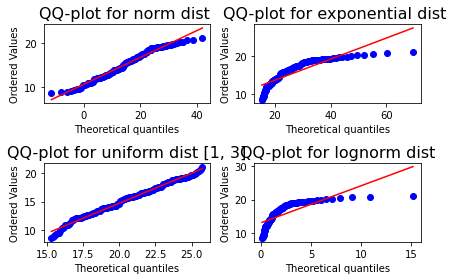

In [319]:
fig = plt.figure()
ax_norm = fig.add_subplot(221)
res = ss.probplot(df3["после"], dist=ss.norm, sparams=(np.mean(df3["после"]), np.var(df3["после"])), plot=ax_norm)
ax_norm.set_title("QQ-plot for norm dist ", fontsize=16.)

ax_expon = fig.add_subplot(222)
res = ss.probplot(df3["после"], dist=ss.expon, sparams=(np.mean(df3["после"]), np.var(df3["после"])), plot=ax_expon)
ax_expon.set_title("QQ-plot for exponential dist ", fontsize=16.)

ax_uni = fig.add_subplot(223)
res = ss.probplot(df3["после"], dist=ss.uniform, sparams=(np.mean(df3["после"]), np.var(df3["после"])), plot=ax_uni)
ax_uni.set_title("QQ-plot for uniform dist [1, 3]", fontsize=16.)

ax_lognorm = fig.add_subplot(224)
res = ss.probplot(df3["после"], dist=ss.lognorm, sparams=(1, 0, np.exp(np.log(2) - 0.5)), plot=ax_lognorm)
ax_lognorm.set_title("QQ-plot for lognorm dist", fontsize=16.)

fig.tight_layout()
plt.show()

In [320]:
ss.kstest(df3["до"], cdf=ss.norm(ss.norm.fit(df3["до"])[0],ss.norm.fit(df3["до"])[1]).cdf)
#1 столбец, нормальное распределение подходит

KstestResult(statistic=0.09189202617143633, pvalue=0.2474154283866843)

In [321]:
ss.kstest(df3["после"], cdf=ss.norm(ss.norm.fit(df3["после"])[0],ss.norm.fit(df3["после"])[1]).cdf)
#2 столбец нормальное распределение подходит

KstestResult(statistic=0.07193056531754183, pvalue=0.5398199928537075)

In [322]:
#проверил критерий Колмогорова-Смирнова на нормальное распределение. Гипотеза подтвердилась. 

использовал критерий однородности

In [323]:
ss.ks_2samp(df3['до'], df3['после'])

KstestResult(statistic=0.08333333333333333, pvalue=0.8011935641620114)

In [324]:
ss.kruskal(df3['до'], df3['после'])

KruskalResult(statistic=0.5219020895581672, pvalue=0.47003143066792574)

Критерий однородности показал, что гипотеза принимается

Делаем вывод: терапия была эффективна, так как pvalue увеличилось

In [325]:
#4
df4 = pd.read_excel('sample_4.xlsx')
df4

,Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0
0,0.0,178.96,211.21,64.29,141.40,177.19,168.97,205.46,181.47,244.97,...,147.18,145.76,56.19,217.17,159.41,60.12,153.24,197.76,233.15,193.15
1,1.0,171.49,57.09,142.90,62.28,238.30,164.43,159.86,177.74,242.90,...,137.37,84.23,160.56,225.04,234.87,175.35,138.90,113.28,71.24,222.07


In [326]:
df4.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

df4.reset_index(inplace=True)
df4.drop(labels = ['index'], axis = 1, inplace = True)

df4 = df4.transpose()

In [327]:
df4.rename(columns={0:'20xx', 1 : '20xx+1'},inplace=True)
df4

,20xx,20xx+1
0.0,178.96,171.49
1.0,211.21,57.09
2.0,64.29,142.90
3.0,141.40,62.28
4.0,177.19,238.30
...,...,...
115.0,60.12,175.35
116.0,153.24,138.90
117.0,197.76,113.28
118.0,233.15,71.24


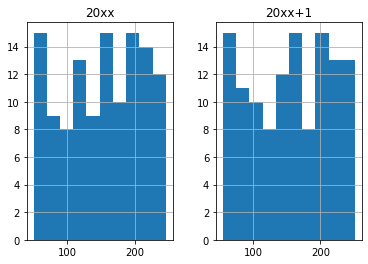

In [328]:
df4.hist()
plt.show()

выдвигаю гипотезу, что цены в среднем увеличились

In [329]:
np.mean(df4['20xx'])

151.1194166666666

In [330]:
np.mean(df4['20xx+1'])

155.27450000000005

моя гипотеза подтвердилась: цены в среднем увеличились.